# Part 1 - Initial IMDB Data Processing
- James M. Irving

## Business Problem

<center><img src="Images/banners/DALL-E-movie-banner_01.webp" width=800px alt="Successful Movie Banner - Made with DALL E"></center>

> I have been hired to produce analyze IMDB's extensive publicly-available dataset, supplement it with financial data from TMDB's API, convert the raw data into a MySQL database, and then use that database for extracting insights and recommendations on how to make a successful movie.

I will use a combination of machine-learning-model-based insights and hypothesis testing to extract insights for our stakeholder.
    

  
### Specifications/Constraints    
- The stakeholder wants to focus on attributes of the movies themselves, vs the actors and directors connected to those movies. 
- They only want to include information related to movies released in the United States.
- They also did not want to include movies released before the year 2000.
- The stakeholder is particularly interested in how the MPAA rating, genre(s), runtime, budget, and production companies influence movie revenue and user-ratings.

# Initial IMDB Data Processing

### IMDB Movie Metadata
- I will download fresh movie metadata from IMDB's public datasets and filter out movies that meet the stakeholder's requirements/constraints.

- IMDB Provides Several Files with varied information for Movies, TV Shows, Made for TV Movies, etc.
    - Overview/Data Dictionary: <a href="https://www.imdb.com/interfaces/" target="_blank">https://www.imdb.com/interfaces/</a>

    - Downloads page: <a href="https://datasets.imdbws.com/" target="_blank">https://datasets.imdbws.com/</a>
- Files to use:
    - title.basics.tsv.gz
    - title.ratings.tsv.gz
    - title.akas.tsv.gz
  

<blockquote style="font-weight:bold;"> 👉<a href="#revisit">Click here</a> to jump to Part 1 - Revisited!</blockquote>

## Imports and Downloading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno

In [2]:
## Importing custom function for project
%load_ext autoreload
%autoreload 2
import project_functions as pf

In [3]:
## Making "Data" Folder to save IMDB files
os.makedirs("Data/",exist_ok=True)
sorted(os.listdir("Data/"))

['.DS_Store',
 '.ipynb_checkpoints',
 'For Tableau',
 'combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.0.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.0.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.0.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.0.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.0.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.0.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.0.csv.gz',
 'f

## Processing Title Basics

In [4]:
## title basics 
url_title_basics = 'https://datasets.imdbws.com/title.basics.tsv.gz'
basics = pd.read_csv(url_title_basics, sep='\t',low_memory=False)
basics.info()
basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10484555 entries, 0 to 10484554
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 719.9+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


### Specified Filtering/Cleaning Steps:
- Permanent Steps
    - Replace "\N" with np.nan
    - keep only titleType==Movie
    - keep startYear 2000-2022
    
- Steps to Revisit/Reconsider:
    - Eliminate movies that include  "Documentary" in genre (see tip below)
    - Eliminate movies that are null for runtimeMinutes
    - Eliminate movies that are null for genre


In [5]:
# pf.check_nulls_nunique()
# def check_nulls_nunique(df,plot=True):
#     report = pd.DataFrame({"# null":df.isna().sum(),
#                  "% null":df.isna().sum()/len(df)*100,
#                  '# unique':df.nunique(),
#                           '% unique':df.nunique()/len(df)*100})
#     display(report.round(2))
#     if plot:
#         missingno.matrix(df)
#         plt.show()
    

#### Check for Nulls Values & \N placeholders

,# null,% null,# unique,% unique
tconst,0,0.0,10484555,100.00
titleType,0,0.0,11,0.00
primaryTitle,11,0.0,4706880,44.89
originalTitle,11,0.0,4730037,45.11
isAdult,0,0.0,12,0.00
startYear,0,0.0,153,0.00
endYear,0,0.0,97,0.00
runtimeMinutes,0,0.0,946,0.01
genres,18,0.0,2359,0.02


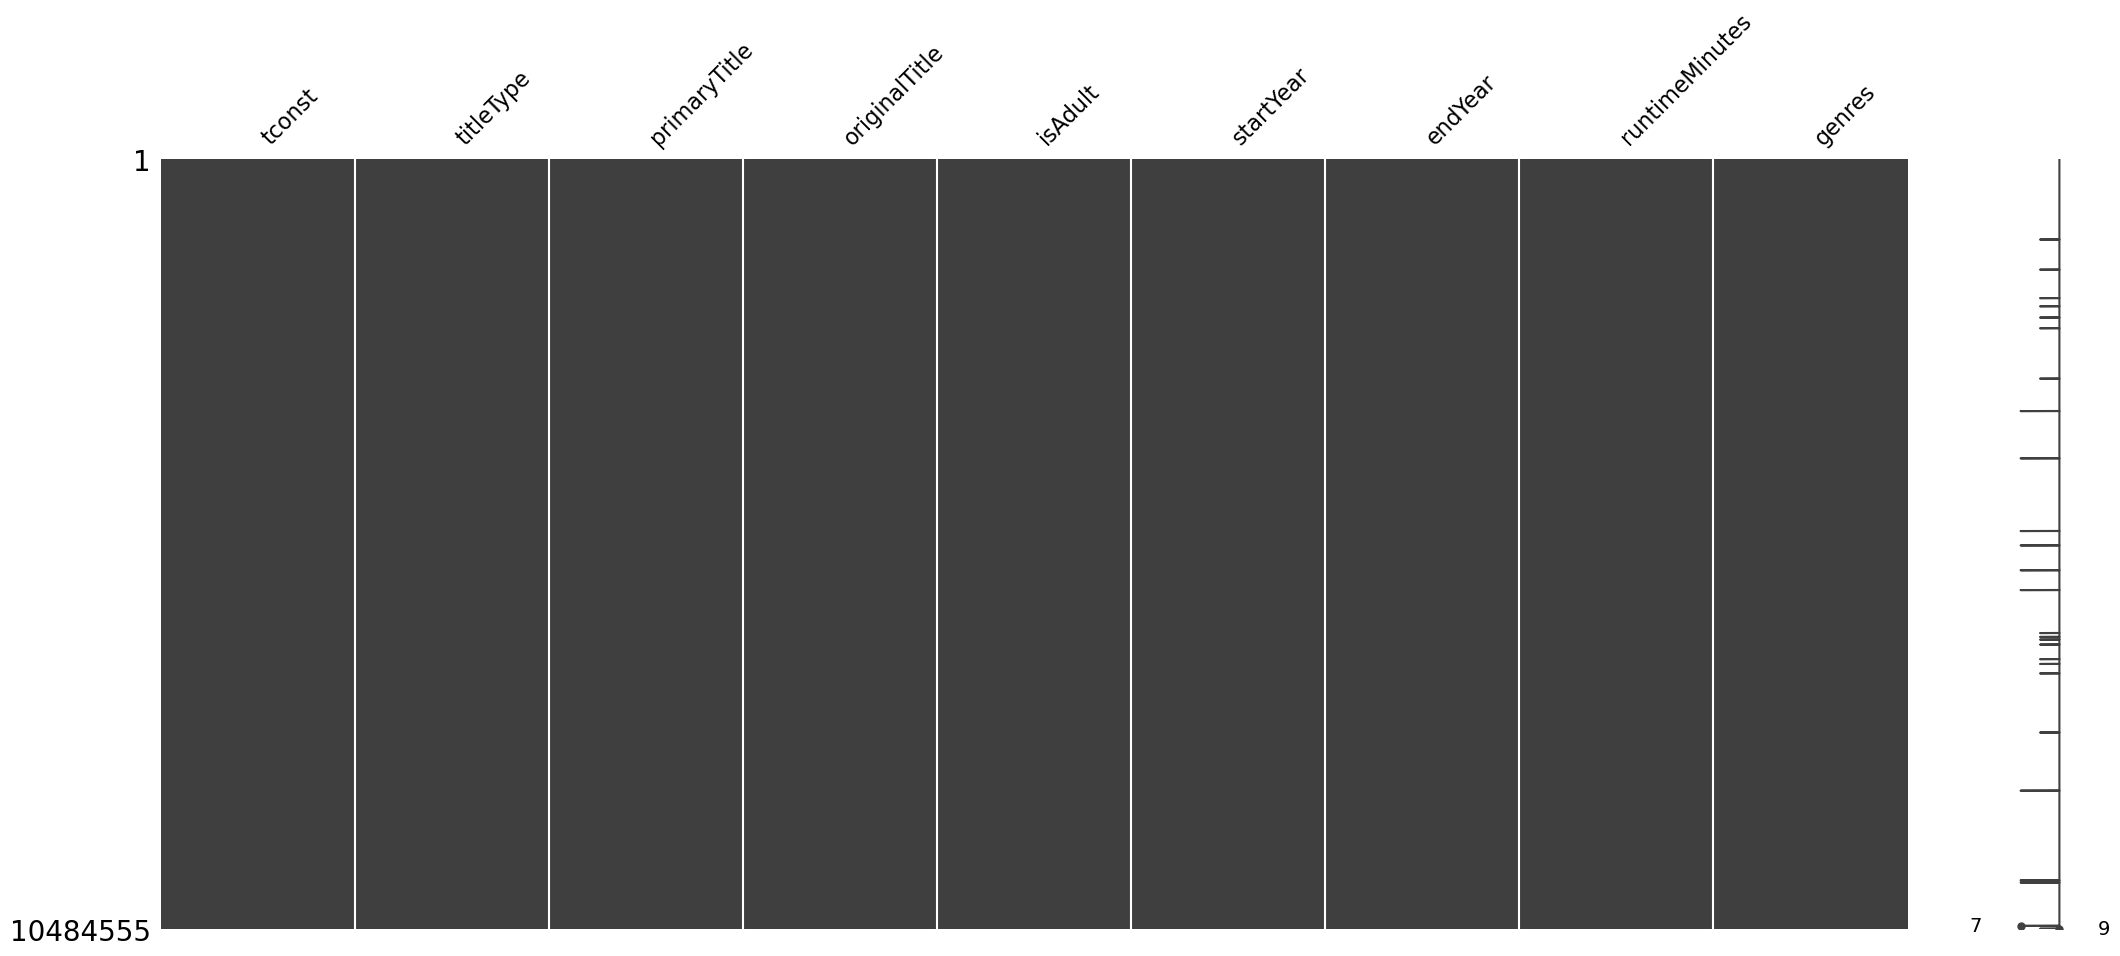

In [6]:
## checking null values
pf.check_nulls_nunique(basics)

,# null,% null,# unique,% unique
tconst,0,0.00,10484555,100.00
titleType,0,0.00,11,0.00
primaryTitle,11,0.00,4706880,44.89
originalTitle,11,0.00,4730037,45.11
isAdult,1,0.00,11,0.00
startYear,1391561,13.27,152,0.00
endYear,10367090,98.88,96,0.00
runtimeMinutes,7297769,69.60,945,0.01
genres,467711,4.46,2358,0.02


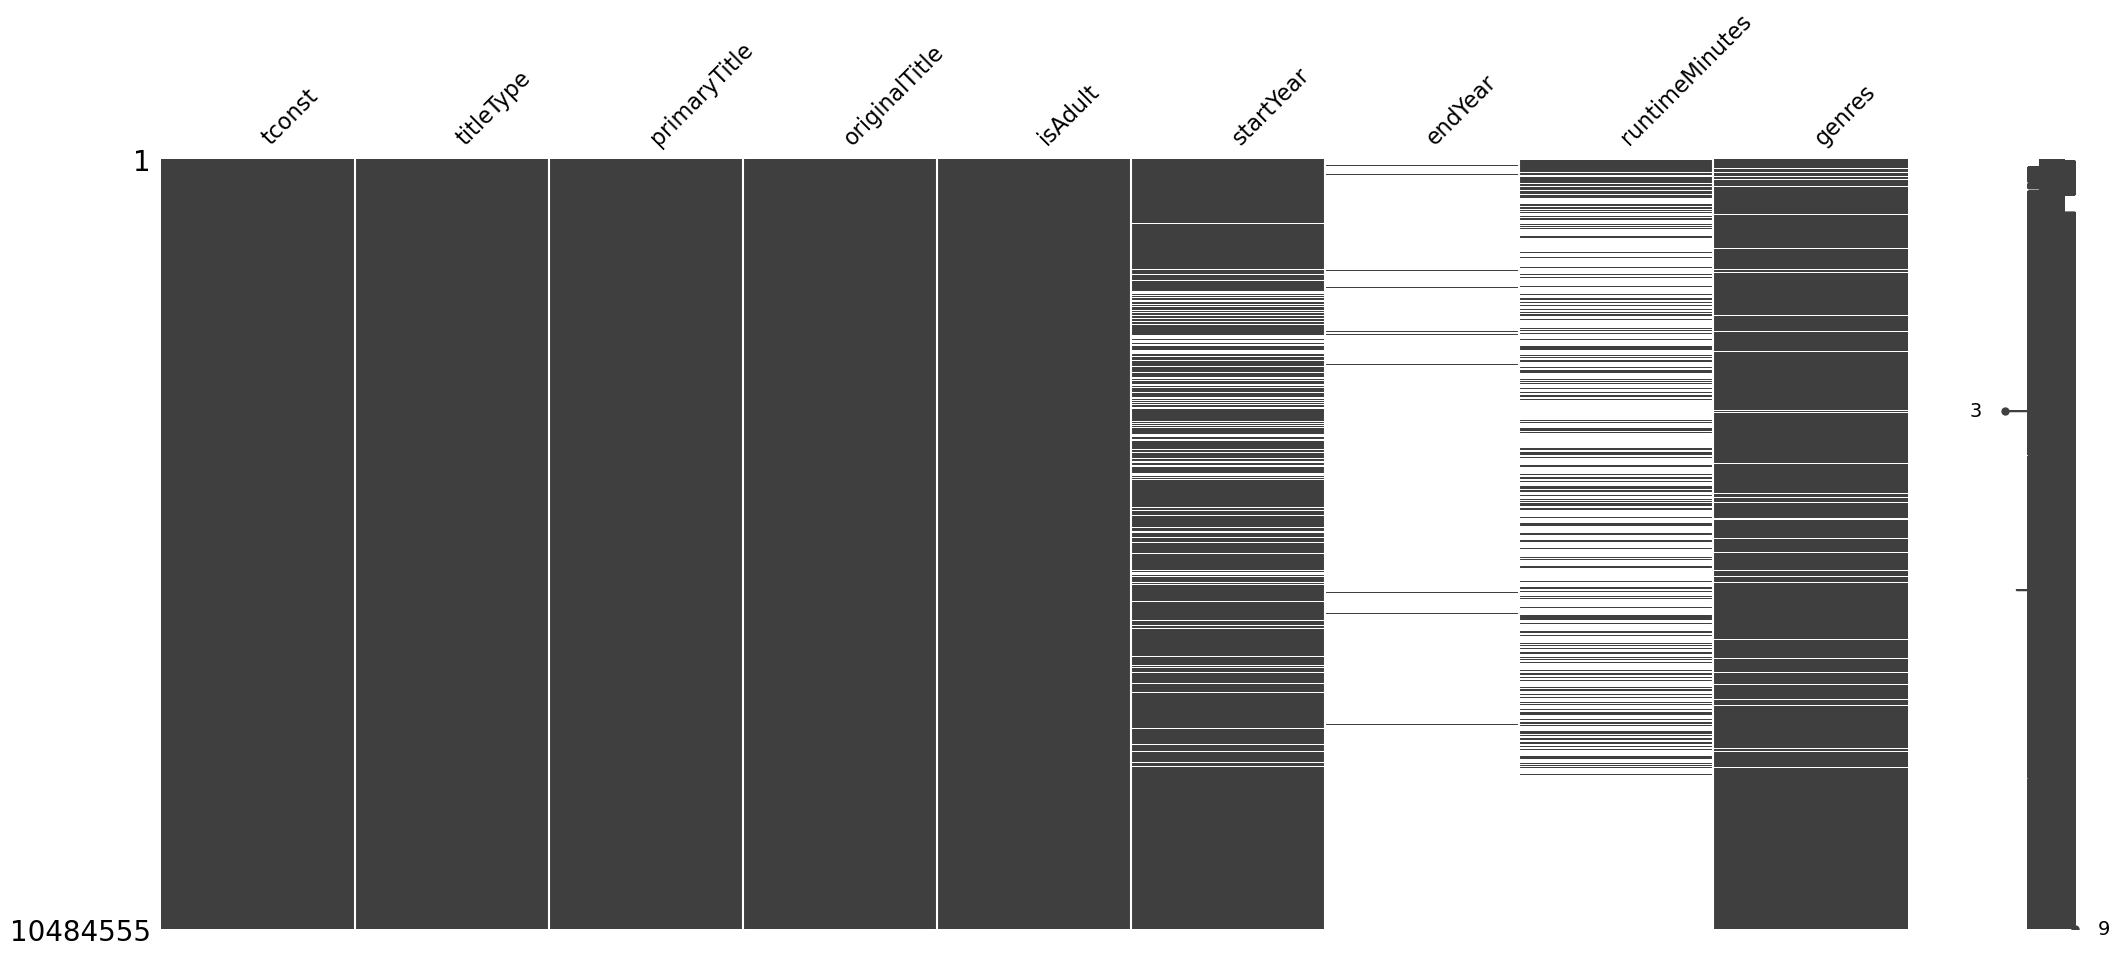

In [7]:
## Replace "\N" with np.nan
basics.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(basics)

##### Observations:
- Note: `endYear` is a pretty worthless column, in relation to movies. For TV shows, this would have potentially been worth keeping. 
    - Decision: Drop column.
- `tconst` vs `primary_title`:
    - I find it somehow odd that there are unique tconst values for every row, but that only ~ 46% of the titles are unique values.
        - Decision: change nothing, for now, but remember this for later.
        
- `genres` are missing for <5% of the movies.
    - Decision: we care about genre, so we will drop null values from genre.

- `startYear` is missing for 13% of the data. This may reflect movies that yet to be released.
    - Decision: drop null values for now. Alternative future approach would be to confirm movie status by joining with other table containing release information.
    
- `runtimeMinutes` is missing from a whopping 73% of the data. 
    - Decision: since this is a feature we care about, it is vital to our analysis. We will drop null values from this feature to reduce the overall number of API calls needed in Part 2.

In [8]:
## Eliminate movies that are null for runtimeMinute, genres, and startYear
basics = basics.dropna(subset=['runtimeMinutes','genres','startYear'])
pf.check_nulls_nunique(basics, plot=False)

,# null,% null,# unique,% unique
tconst,0,0.00,2912024,100.00
titleType,0,0.00,10,0.00
primaryTitle,1,0.00,1885953,64.76
originalTitle,1,0.00,1905825,65.45
isAdult,0,0.00,2,0.00
startYear,0,0.00,149,0.01
endYear,2857691,98.13,92,0.00
runtimeMinutes,0,0.00,924,0.03
genres,0,0.00,2223,0.08


In [9]:
## drop endYear
basics = basics.drop(columns=['endYear'])
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...
10484505,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,49,Documentary
10484511,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,43,"Family,Game-Show,Reality-TV"
10484546,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,11,"Adventure,Animation,Comedy"
10484553,tt9916856,short,The Wind,The Wind,0,2015,27,Short


### Filtering for Stakeholder Specifications

#### Keeping only Full-Length Movies Released in Theaters

In [10]:
## Checking title types
basics['titleType'].value_counts()

tvEpisode       1481763
short            619181
movie            388652
video            188545
tvMovie           93214
tvSeries          93056
tvSpecial         20058
tvMiniSeries      18379
tvShort            8788
videoGame           388
Name: titleType, dtype: int64

In [11]:
## keep only titleType==Movie
basics = basics.loc[ basics['titleType']=='movie']
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
...,...,...,...,...,...,...,...,...
10484405,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,123,Drama
10484446,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,57,Documentary
10484473,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,100,Documentary
10484495,tt9916730,movie,6 Gunn,6 Gunn,0,2017,116,Drama


#### Eliminating Documentaries

In [12]:

is_documentary = basics['genres'].str.contains('documentary',case=False)
is_documentary.value_counts()

False    294034
True      94618
Name: genres, dtype: int64

In [13]:
# ## Eliminate movies that include  "Documentary" in genre 
# is_documentary = basics['genres'].str.contains('documentary',case=False)
# basics = basics[~is_documentary]
# basics.head()

In [14]:
### Convert startyear to numeric for slicing
## convert numeric features
basics['startYear'] = basics['startYear'].astype(float)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_89446/3247079554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basics['startYear'] = basics['startYear'].astype(float)


In [15]:
## keep startYear 2000-2022
import datetime as dt
before_year = dt.date.today().year + 1
basics = basics[(basics['startYear']>=2000)&(basics['startYear']<before_year)]
# basics = basics[basics['startYear']>=2000]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
13079,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021.0,94,Documentary
27745,tt0028248,movie,Shipmates o' Mine,Shipmates o' Mine,0,2022.0,87,Musical
34798,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
61108,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,70,Drama
67660,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
...,...,...,...,...,...,...,...,...
10484405,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019.0,123,Drama
10484446,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015.0,57,Documentary
10484473,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007.0,100,Documentary
10484495,tt9916730,movie,6 Gunn,6 Gunn,0,2017.0,116,Drama


In [16]:
is_documentary = basics['genres'].str.contains('documentary',case=False)
is_documentary.value_counts()

False    158663
True      80750
Name: genres, dtype: int64

## Processing Title Ratings

#### Specified Filtering Steps:
- Ratings
    - Replace "\N" with np.nan (if any)
    
- Keep movies that are in final filtered basics dataframe


In [17]:
## title ratings
url_title_ratings ="https://datasets.imdbws.com/title.ratings.tsv.gz"
ratings = pd.read_csv(url_title_ratings,sep='\t',low_memory=False)
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392127 entries, 0 to 1392126
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1392127 non-null  object 
 1   averageRating  1392127 non-null  float64
 2   numVotes       1392127 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 31.9+ MB


,tconst,averageRating,numVotes
0,tt0000001,5.7,2014
1,tt0000002,5.7,270
2,tt0000003,6.5,1937
3,tt0000004,5.5,178
4,tt0000005,6.2,2714


,# null,% null,# unique,% unique
tconst,0,0.0,1392127,100.00
averageRating,0,0.0,91,0.01
numVotes,0,0.0,21986,1.58


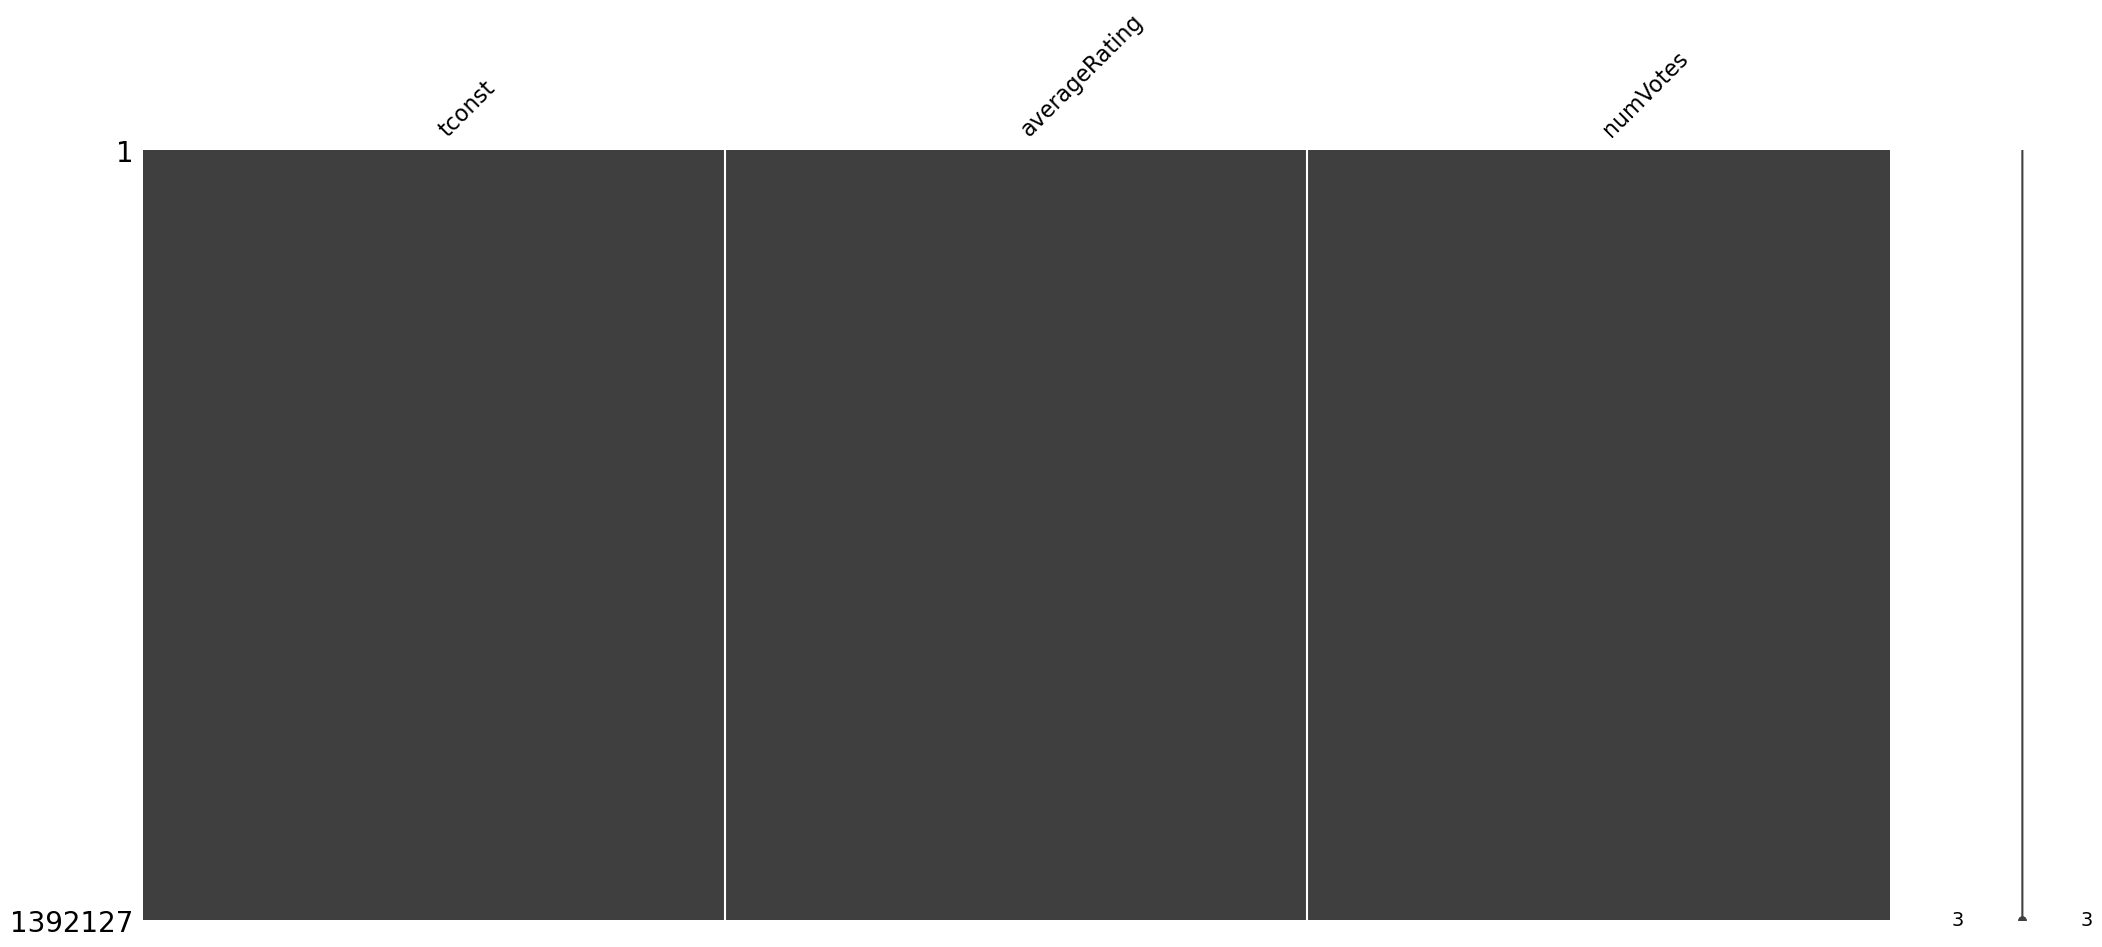

In [18]:
# Replace "\N" with np.nan (if any)
ratings.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(ratings)

## Processing Title AKAs

#### Specified Filtering Steps:
- keep only US entries.
- Replace "\N" with np.nan

In [19]:
## title AKAs
url_title_akas ="https://datasets.imdbws.com/title.akas.tsv.gz"
akas = pd.read_csv(url_title_akas,sep='\t',low_memory=False)
akas.info()
akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38463476 entries, 0 to 38463475
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  object
dtypes: int64(1), object(7)
memory usage: 2.3+ GB


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [20]:
## The AKAs file has the information on country where it released and language
akas = akas[(akas['region'] == 'US')]
akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
14,tt0000002,7,The Clown and His Dogs,US,\N,\N,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,\N,imdbDisplay,\N,0
36,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0
41,tt0000005,6,Blacksmith Scene #1,US,\N,alternative,\N,0
...,...,...,...,...,...,...,...,...
38463002,tt9916560,1,March of Dimes Presents: Once Upon a Dime,US,\N,imdbDisplay,\N,0
38463072,tt9916620,1,The Copeland Case,US,\N,imdbDisplay,\N,0
38463161,tt9916702,1,Loving London: The Playground,US,\N,\N,\N,0
38463204,tt9916756,1,Pretty Pretty Black Girl,US,\N,imdbDisplay,\N,0


In [21]:
# ## check for null values
# akas.isna().sum()

,# null,% null,# unique,% unique
titleId,0,0.00,1407845,94.28
ordering,0,0.00,123,0.01
title,0,0.00,1152454,77.17
region,0,0.00,1,0.00
language,1488974,99.71,8,0.00
types,504233,33.77,13,0.00
attributes,1445203,96.78,163,0.01
isOriginalTitle,1341,0.09,2,0.00


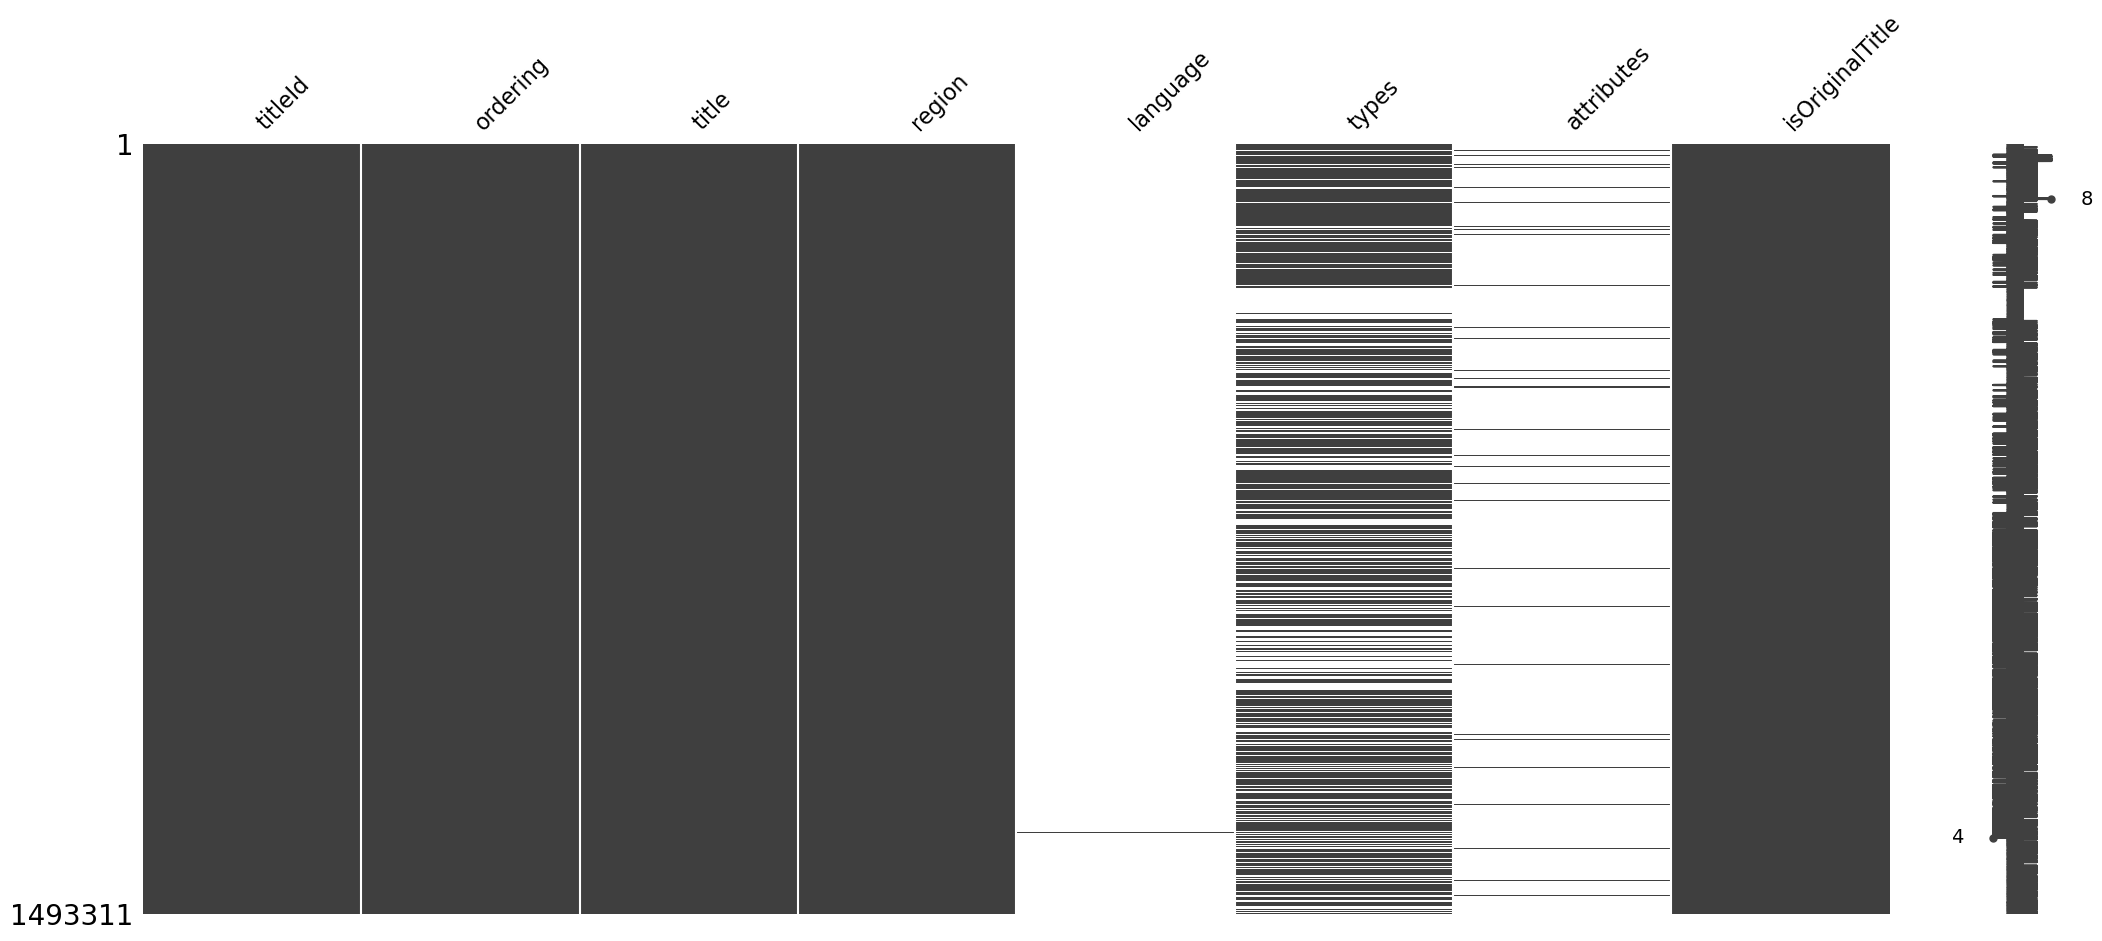

In [22]:
## replace\N placeholders with NaN and re-check for nuls
akas.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(akas)

#### Observations:
- `language`: workthless, drop it.
- `types`: explore

In [23]:
akas.drop(columns='language',inplace=True)
akas.head()

,titleId,ordering,title,region,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,imdbDisplay,NaN,0
14,tt0000002,7,The Clown and His Dogs,US,NaN,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,imdbDisplay,NaN,0
36,tt0000005,1,Blacksmithing Scene,US,alternative,NaN,0
41,tt0000005,6,Blacksmith Scene #1,US,alternative,NaN,0


#### Exploring Types

<Axes: >

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 2 () missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


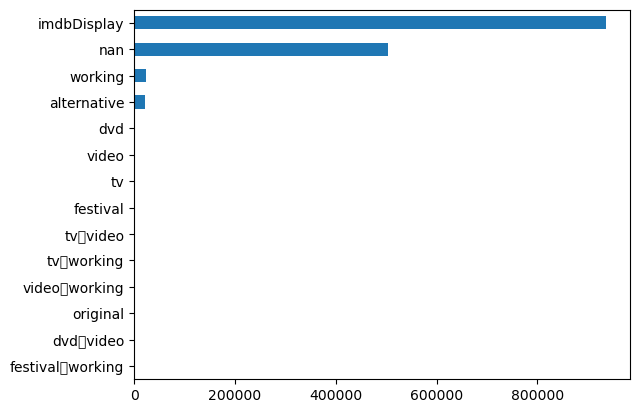

In [24]:
akas['types'].value_counts(dropna=False).sort_values().plot(kind='barh')

> Keep all types, since this table will mainly be used for filtering region and perhaps referenced later for comparing duplicate titles that had unique ids in title basics.

## Final Filtering: Removing Non-US Movies

- Now that both AKAs and basics have been processed, we can remove any movie ids from title basics that are NOT in the US-filtered AKAs dataframe.

### Removing Non-US From Title Basics

In [25]:
## Only keep movie ids that are in the final filtered akas
keepers = basics['tconst'].isin(akas['titleId'])
basics = basics[keepers]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
34798,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
61108,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,70,Drama
67660,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
69147,tt0070596,movie,Socialist Realism,El realismo socialista,0,2023.0,78,Drama
80545,tt0082328,movie,Embodiment of Evil,Encarnação do Demônio,0,2008.0,94,Horror
...,...,...,...,...,...,...,...,...
10483910,tt9915436,movie,Vida em Movimento,Vida em Movimento,0,2019.0,70,Documentary
10484088,tt9915872,movie,The Last White Witch,Boku no kanojo wa mahoutsukai,0,2019.0,97,"Comedy,Drama,Fantasy"
10484228,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,51,Drama
10484237,tt9916190,movie,Safeguard,Safeguard,0,2020.0,95,"Action,Adventure,Thriller"


### Removing Non-US From Ratings

- I originally used the AKAs table to filter out which movies to keep from ratings.
- I decided to compare using the AKAs table VS the using the basics table, which has already had non-US movies removed.
- Since I will 

In [26]:
## Keeping only movie that exist in basics 
keepers_akas = ratings['tconst'].isin(akas['titleId'])
keepers_basics = ratings['tconst'].isin(basics['tconst'])

print('- If filter using AKAs:')
display(keepers_akas.value_counts())

print('- If filter using Basics:')
display(keepers_basics.value_counts())

- If filter using AKAs:


False    871782
True     520345
Name: tconst, dtype: int64

- If filter using Basics:


False    1293964
True       98163
Name: tconst, dtype: int64

> **MUST DECIDE HOW TO DETERMINE FINAL KEEPERS AND IF REMOVING DOCUMENTARIES OR NOT**

In [27]:
ratings_final = ratings[keepers_basics]
ratings_final

,tconst,averageRating,numVotes
18086,tt0035423,6.4,88417
40897,tt0062336,6.4,185
46774,tt0069049,6.7,7939
48120,tt0070596,7.5,52
58285,tt0082328,5.9,1765
...,...,...,...
1392047,tt9914972,7.1,291
1392072,tt9915872,6.4,9
1392085,tt9916170,7.0,7
1392086,tt9916190,3.7,248


## Saving Final Files

#### Saving Title Basics

In [28]:
## Saving and immediately loading (to verify)
fpath_basics= 'Data/title_basics_cleaned.csv.gz'
basics.to_csv(fpath_basics,compression='gzip',index=False)
basics = pd.read_csv(fpath_basics)
basics.info()
basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128875 entries, 0 to 128874
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          128875 non-null  object 
 1   titleType       128875 non-null  object 
 2   primaryTitle    128875 non-null  object 
 3   originalTitle   128875 non-null  object 
 4   isAdult         128875 non-null  int64  
 5   startYear       128875 non-null  float64
 6   runtimeMinutes  128875 non-null  int64  
 7   genres          128875 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 7.9+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
3,tt0070596,movie,Socialist Realism,El realismo socialista,0,2023.0,78,Drama
4,tt0082328,movie,Embodiment of Evil,Encarnação do Demônio,0,2008.0,94,Horror


#### Saving Title Ratings

In [29]:
ratings_final.to_csv('Data/title_ratings_cleaned.csv.gz',compression='gzip',index=False)
ratings = pd.read_csv('Data/title_ratings_cleaned.csv.gz')
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98163 entries, 0 to 98162
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         98163 non-null  object 
 1   averageRating  98163 non-null  float64
 2   numVotes       98163 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


,tconst,averageRating,numVotes
0,tt0035423,6.4,88417
1,tt0062336,6.4,185
2,tt0069049,6.7,7939
3,tt0070596,7.5,52
4,tt0082328,5.9,1765


#### Saving Title AKAs

In [30]:
akas.to_csv('Data/title_akas_cleaned.csv.gz',compression='gzip',index=False)
akas = pd.read_csv('Data/title_akas_cleaned.csv.gz')
akas.info()
akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493311 entries, 0 to 1493310
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   titleId          1493311 non-null  object 
 1   ordering         1493311 non-null  int64  
 2   title            1493311 non-null  object 
 3   region           1493311 non-null  object 
 4   types            989078 non-null   object 
 5   attributes       48108 non-null    object 
 6   isOriginalTitle  1491970 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 79.8+ MB


,titleId,ordering,title,region,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,alternative,NaN,0.0


### Optional Check for files in Data folder

In [31]:
# optional 
sorted(os.listdir("Data/"))

['.DS_Store',
 '.ipynb_checkpoints',
 'For Tableau',
 'combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.0.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.0.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.0.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.0.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.0.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.0.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.0.csv.gz',
 'f

## Final Movie Count

In [32]:
print(f"There are {len(basics):,} rows in title_basics")
print(f"There are {len(ratings):,} rows in title_ratings")
print(f"There are {len(akas):,} rows in akas")

There are 128,875 rows in title_basics
There are 98,163 rows in title_ratings
There are 1,493,311 rows in akas


> See notebook "`Part 2A - TMDB API Calls.ipynb`" for the next part of the analysis.

<a name="revisit"> </a>
# **Part 1 - Revisited: Extracting IMDB Data on Cast/Crew**

- 02/10/23

In [33]:
name_basics_url = "https://datasets.imdbws.com/name.basics.tsv.gz"
title_crew_url ="https://datasets.imdbws.com/title.crew.tsv.gz"
title_principals_url = "https://datasets.imdbws.com/title.principals.tsv.gz"

## Title Crew

In [34]:
title_crew = pd.read_csv(title_crew_url, sep='\t')
title_crew

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
10484550,tt9916848,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10484551,tt9916850,nm1485677,"nm9187127,nm1485677,nm9826385,nm1628284"
10484552,tt9916852,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10484553,tt9916856,nm10538645,nm6951431


In [35]:
keepers = title_crew['tconst'].isin(basics['tconst'])
keepers.sum()

128875

In [36]:
title_crew = title_crew[keepers]
title_crew

,tconst,directors,writers
34798,tt0035423,nm0003506,"nm0737216,nm0003506"
61108,tt0062336,"nm0749914,nm0765384","nm0749914,nm1146177"
67660,tt0069049,nm0000080,"nm0000080,nm0462648"
69147,tt0070596,"nm0749914,nm0765384","nm0667610,nm0749914,nm0765384"
80545,tt0082328,nm0596261,"nm0707963,nm0596261"
...,...,...,...
10483910,tt9915436,nm6119329,"nm6449800,nm10537887,nm3644375,nm6119329"
10484088,tt9915872,nm8063415,nm2507310
10484228,tt9916170,nm5412267,"nm5412267,nm6743460,nm3245789"
10484237,tt9916190,nm7308376,nm7308376


#### Saving title_crew

In [37]:
## Saving and immediately loading (to verify)
fname = 'Data/title_crew.csv.gz'
title_crew.to_csv(fname,compression='gzip',index=False)
title_crew = pd.read_csv(fname)
title_crew.info()
title_crew.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128875 entries, 0 to 128874
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     128875 non-null  object
 1   directors  128875 non-null  object
 2   writers    128875 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


,tconst,directors,writers
0,tt0035423,nm0003506,"nm0737216,nm0003506"
1,tt0062336,"nm0749914,nm0765384","nm0749914,nm1146177"
2,tt0069049,nm0000080,"nm0000080,nm0462648"
3,tt0070596,"nm0749914,nm0765384","nm0667610,nm0749914,nm0765384"
4,tt0082328,nm0596261,"nm0707963,nm0596261"


## Get list of directors and writers from final dataset

In [38]:
directors = title_crew['directors'].str.split(',').explode()
nconst_list = directors.unique().tolist()
len(nconst_list)

89944

In [39]:
writers = title_crew['writers'].str.split(',').explode()
nconst_list.extend( writers.unique().tolist())


unique_nconsts = np.unique(nconst_list)
len(unique_nconsts)

148883

## Name Basics

In [40]:
name_basics = pd.read_csv(name_basics_url, sep='\t')
name_basics

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0050419,tt0072308,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0075213,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0069467,tt0050986"
...,...,...,...,...,...,...
13183425,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt14069590,tt11657662,tt2455546"
13183426,nm9993716,Essias Loberg,\N,\N,NaN,\N
13183427,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
13183428,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744


In [41]:
idx_matched = name_basics['nconst'].isin(unique_nconsts)
idx_matched.sum()

148882

In [42]:
name_basics[idx_matched]

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0069467,tt0050986"
17,nm0000018,Kirk Douglas,1916,2020,"actor,producer,soundtrack","tt0080736,tt0054331,tt0050825,tt0049456"
40,nm0000041,Akira Kurosawa,1910,1998,"writer,director,assistant_director","tt0051808,tt0047478,tt0089881,tt0080979"
53,nm0000054,Marilyn Monroe,1926,1962,"soundtrack,actress,writer","tt0045810,tt0045891,tt0053291,tt0048605"
79,nm0000080,Orson Welles,1915,1985,"actor,writer,director","tt0052311,tt0033467,tt0040525,tt0057427"
...,...,...,...,...,...,...
13182884,nm9993103,Brianna Temple,\N,\N,"actress,writer,camera_department","tt9212760,tt16225204,tt9486184,tt7846794"
13182965,nm9993197,Juanjo Braulio,\N,\N,writer,tt8743032
13183072,nm9993311,Sadegh Khoshhal,\N,\N,writer,"tt13344348,tt15249094,tt8743086,tt8743110"
13183147,nm9993398,Oliviero Del Papa,\N,\N,writer,"tt15662942,tt14165314,tt10270592,tt10941386"


In [43]:
name_basics = name_basics[idx_matched]
name_basics

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0069467,tt0050986"
17,nm0000018,Kirk Douglas,1916,2020,"actor,producer,soundtrack","tt0080736,tt0054331,tt0050825,tt0049456"
40,nm0000041,Akira Kurosawa,1910,1998,"writer,director,assistant_director","tt0051808,tt0047478,tt0089881,tt0080979"
53,nm0000054,Marilyn Monroe,1926,1962,"soundtrack,actress,writer","tt0045810,tt0045891,tt0053291,tt0048605"
79,nm0000080,Orson Welles,1915,1985,"actor,writer,director","tt0052311,tt0033467,tt0040525,tt0057427"
...,...,...,...,...,...,...
13182884,nm9993103,Brianna Temple,\N,\N,"actress,writer,camera_department","tt9212760,tt16225204,tt9486184,tt7846794"
13182965,nm9993197,Juanjo Braulio,\N,\N,writer,tt8743032
13183072,nm9993311,Sadegh Khoshhal,\N,\N,writer,"tt13344348,tt15249094,tt8743086,tt8743110"
13183147,nm9993398,Oliviero Del Papa,\N,\N,writer,"tt15662942,tt14165314,tt10270592,tt10941386"


In [44]:
# 

- Exclude anyone that is missing "knownForTitles"

In [45]:
idx_not_known = name_basics['knownForTitles'].str.contains(r'\\N')
idx_not_known.sum()

426

In [46]:
name_basics[idx_not_known]

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
664555,nm0705044,Mark Racco,\N,\N,"director,producer,writer",\N
877026,nm0932469,Steve Willis,\N,\N,"director,producer",\N
1478536,nm10599895,Brice Vdh,\N,\N,"director,editor,cinematographer",\N
1770002,nm10907252,Thomas Monroe,\N,\N,"actor,composer,producer",\N
2778437,nm11956257,Stephanie Quick,\N,\N,"producer,writer,director",\N
...,...,...,...,...,...,...
11854138,nm8360657,Nick Marcus,\N,\N,writer,\N
12744430,nm9473898,Johanners Froebel-Parker,\N,\N,writer,\N
12767556,nm9501422,Alan S. Ramadan,\N,\N,writer,\N
13148469,nm9952702,Bradley Bell,\N,\N,"director,writer,visual_effects",\N


In [47]:
# name_basics = name_basics[~idx_not_known]
# name_basics

In [48]:
# name_basics.memory_usage().sum() *1e-6

In [49]:
# name_basics.to_csv('')

#### Saving name_basics

In [50]:
## Saving and immediately loading (to verify)
fname = 'Data/name_basics.csv.gz'
name_basics.to_csv(fname,compression='gzip',index=False)
name_basics = pd.read_csv(fname)
name_basics.info()
name_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148882 entries, 0 to 148881
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   nconst             148882 non-null  object
 1   primaryName        148882 non-null  object
 2   birthYear          148882 non-null  object
 3   deathYear          148882 non-null  object
 4   primaryProfession  148749 non-null  object
 5   knownForTitles     148882 non-null  object
dtypes: object(6)
memory usage: 6.8+ MB


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0069467,tt0050986"
1,nm0000018,Kirk Douglas,1916,2020,"actor,producer,soundtrack","tt0080736,tt0054331,tt0050825,tt0049456"
2,nm0000041,Akira Kurosawa,1910,1998,"writer,director,assistant_director","tt0051808,tt0047478,tt0089881,tt0080979"
3,nm0000054,Marilyn Monroe,1926,1962,"soundtrack,actress,writer","tt0045810,tt0045891,tt0053291,tt0048605"
4,nm0000080,Orson Welles,1915,1985,"actor,writer,director","tt0052311,tt0033467,tt0040525,tt0057427"


## Title Principles 

### title_principals

In [51]:
title_princ = pd.read_csv(title_principals_url, sep='\t')
title_princ

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
60116698,tt9916880,5,nm0584014,director,\N,\N
60116699,tt9916880,6,nm0996406,director,principal director,\N
60116700,tt9916880,7,nm1482639,writer,\N,\N
60116701,tt9916880,8,nm2586970,writer,books,\N


In [52]:
keepers = title_princ['tconst'].isin(basics['tconst'])
keepers.sum()

1055126

In [53]:
title_princ = title_princ[keepers]
title_princ

,tconst,ordering,nconst,category,job,characters
283673,tt0035423,10,nm0107463,editor,\N,\N
283674,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
283675,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
283676,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
283677,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"
...,...,...,...,...,...,...
60115398,tt9916362,5,nm1893148,director,\N,\N
60115399,tt9916362,6,nm3471432,writer,screenplay by,\N
60115400,tt9916362,7,nm2970042,producer,executive producer,\N
60115401,tt9916362,8,nm4065853,producer,producer,\N


#### Saving title_principals

In [54]:
## Saving and immediately loading (to verify)
fname = 'Data/title_principals.csv.gz'
title_princ.to_csv(fname,compression='gzip',index=False)
title_princ = pd.read_csv(fname)
title_princ.info()
title_princ.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055126 entries, 0 to 1055125
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1055126 non-null  object
 1   ordering    1055126 non-null  int64 
 2   nconst      1055126 non-null  object
 3   category    1055126 non-null  object
 4   job         1055126 non-null  object
 5   characters  1055126 non-null  object
dtypes: int64(1), object(5)
memory usage: 48.3+ MB


,tconst,ordering,nconst,category,job,characters
0,tt0035423,10,nm0107463,editor,\N,\N
1,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
2,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
3,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
4,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"


## Post-Saving Exploration

In [55]:
basics[basics['primaryTitle'].str.contains("Marvel")]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
14072,tt0800347,movie,Marvelous,Marvelous,0,2006.0,90,"Comedy,Drama"
21075,tt10676048,movie,The Marvels,The Marvels,0,2023.0,105,"Action,Adventure,Fantasy"
21280,tt10713444,movie,Merely Marvelous: The Dancing Genius of Gwen V...,Merely Marvelous: The Dancing Genius of Gwen V...,0,2019.0,82,Documentary
24963,tt11389868,movie,Marvelous and the Black Hole,Marvelous and the Black Hole,0,2021.0,81,"Comedy,Drama"
26789,tt11760456,movie,Peter Pan: A Marvel in the Making,Peter Pan: A Marvel in the Making,0,2019.0,52,Documentary
31188,tt12692980,movie,Thomas & Friends: Marvelous Machinery,Thomas & Friends: Marvelous Machinery,0,2020.0,45,"Action,Adventure,Animation"
38296,tt13885628,movie,Marvel's Behind the Mask,Marvel's Behind the Mask,0,2021.0,64,Documentary
38352,tt13895038,movie,We're the Marvels,We're the Marvels,0,2021.0,74,Drama
43392,tt14873094,movie,Dorothy and Toto's Storytime: The Marvelous La...,Dorothy and Toto's Storytime: The Marvelous La...,0,2021.0,80,Family
50083,tt1631359,movie,Maggie Marvel,Maggie Marvel,0,2011.0,90,"Comedy,Drama"


## Quick EDA

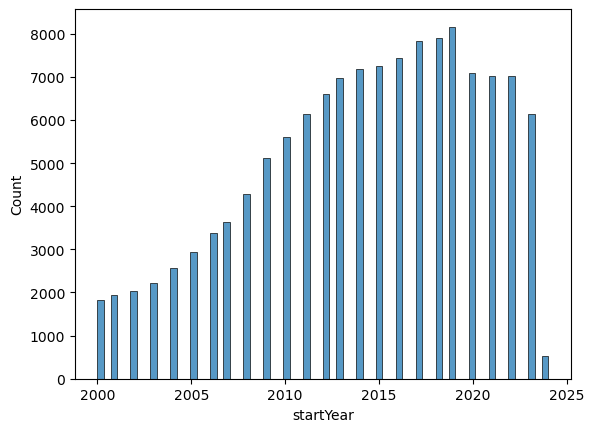

In [58]:
sns.histplot(data=basics, x='startYear');

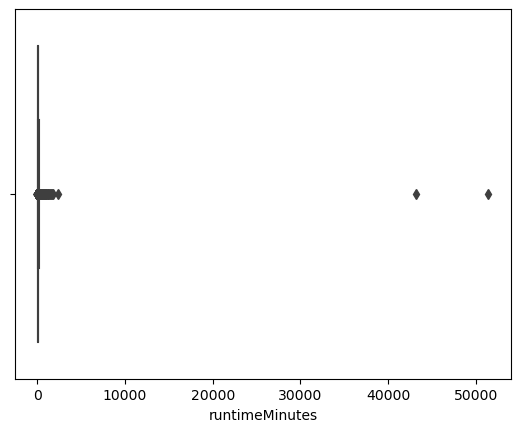

In [63]:
sns.boxplot(data=basics, x='runtimeMinutes');

In [66]:
# Filtering for Long Movies
filter_long = basics['runtimeMinutes']>60*5
filter_long.sum()

177

In [73]:
# Check how many titles have different primary vs original
filter_title_mismatch = basics['primaryTitle'] != basics['originalTitle']
filter_title_mismatch.sum() / len(basics)

0.2299980601357905

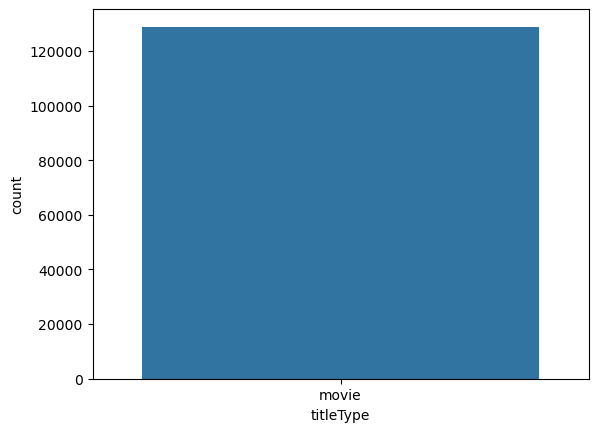

In [62]:
sns.countplot(data=basics, x='titleType');